In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr

In [47]:
df = pd.read_pickle('/home/hbkoziel/pyfesom/codes/transects/Transects_transport')
df /= 10**6
df.head()

,DAVIS_DIN_transport,DAVIS_VOL_transport,BERING_DIN_transport,BERING_VOL_transport,FRAM_DIN_transport,FRAM_VOL_transport,BSO_DIN_transport,BSO_VOL_transport
time,,,,,,,,
1985-01-01,-18.414102,-2.508610,5.097805,1.526888,-17.193391,-1.280298,19.836025,2.149108
1985-02-01,-20.351713,-2.625183,3.862312,0.946797,-16.748924,-1.194133,30.086166,3.473097
1985-03-01,-18.841612,-2.516344,5.238954,0.807539,-17.128430,-1.151412,23.603668,2.698374
1985-04-01,-11.313222,-1.833806,9.325522,1.254068,-10.406241,-0.885441,22.212744,2.380350
1985-05-01,-15.279633,-2.113982,10.954400,1.537659,-9.268519,-0.846484,18.412224,2.420874


In [48]:
df_seasonal_mean = df.groupby(by=[df.index.month]).mean()
df_seasonal_std = df.groupby(by=[df.index.month]).std()

(1, 12)

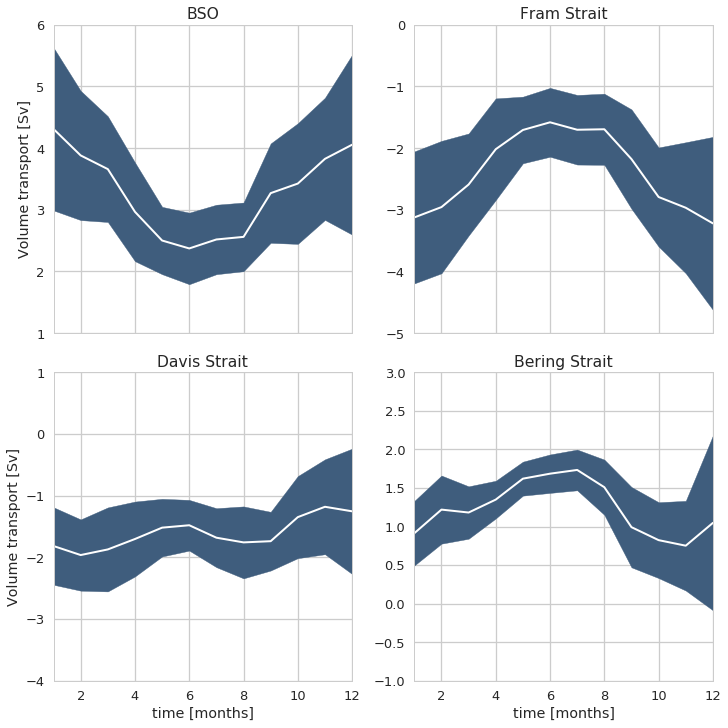

In [62]:
rows,cols = 2,2
figsize=(10, 10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

ax1.plot(df_seasonal_mean.index, df_seasonal_mean['BSO_VOL_transport'], color="white", lw=2) 
ax1.fill_between(df_seasonal_mean.index, df_seasonal_mean['BSO_VOL_transport'] - df_seasonal_std['BSO_VOL_transport'],\
                 df_seasonal_mean['BSO_VOL_transport'] + df_seasonal_std['BSO_VOL_transport'], color="#3F5D7D") 
ax1.set_title('BSO')
ax1.set_ylim(1,6)
ax1.set_ylabel('Volume transport [Sv]')

ax2.plot(df_seasonal_mean.index, df_seasonal_mean['FRAM_VOL_transport'], color="white", lw=2) 
ax2.fill_between(df_seasonal_mean.index, df_seasonal_mean['FRAM_VOL_transport'] - df_seasonal_std['FRAM_VOL_transport'],\
                 df_seasonal_mean['FRAM_VOL_transport'] + df_seasonal_std['FRAM_VOL_transport'], color="#3F5D7D") 
ax2.set_title('Fram Strait')
ax2.set_ylim(-5,0)

ax3.plot(df_seasonal_mean.index, df_seasonal_mean['DAVIS_VOL_transport'], color="white", lw=2) 
ax3.fill_between(df_seasonal_mean.index, df_seasonal_mean['DAVIS_VOL_transport'] - df_seasonal_std['DAVIS_VOL_transport'],\
                 df_seasonal_mean['DAVIS_VOL_transport'] + df_seasonal_std['DAVIS_VOL_transport'], color="#3F5D7D") 
ax3.set_title('Davis Strait')
ax3.set_ylim(-4,1)
ax3.set_ylabel('Volume transport [Sv]')
ax3.set_xlabel('time [months]')

ax4.plot(df_seasonal_mean.index, df_seasonal_mean['BERING_VOL_transport'], color="white", lw=2) 
ax4.fill_between(df_seasonal_mean.index, df_seasonal_mean['BERING_VOL_transport'] - df_seasonal_std['BERING_VOL_transport'],\
                 df_seasonal_mean['BERING_VOL_transport'] + df_seasonal_std['BERING_VOL_transport'], color="#3F5D7D") 
ax4.set_title('Bering Strait')
ax4.set_ylim(-1,3)
ax4.set_xlabel('time [months]')

plt.xlim(1,12)

(1, 12)

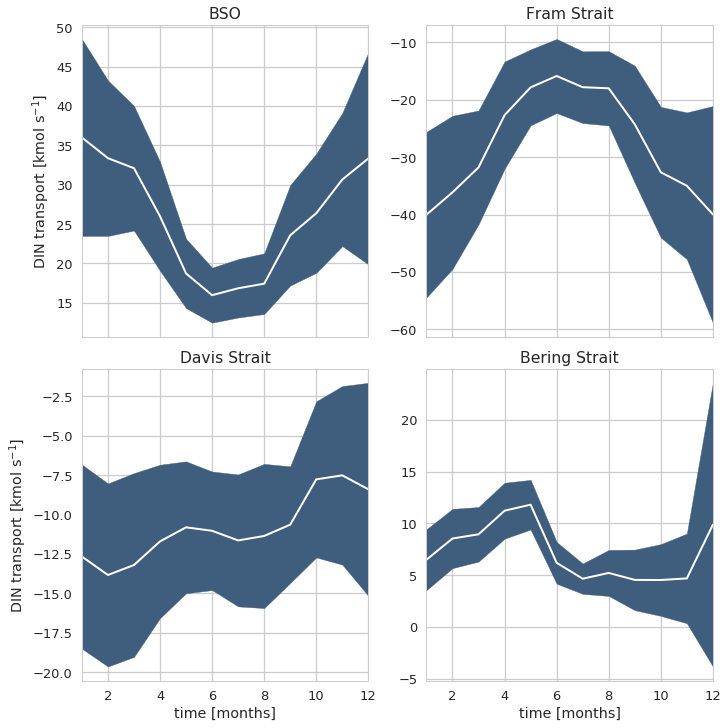

In [67]:
rows,cols = 2,2
figsize=(10, 10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

ax1.plot(df_seasonal_mean.index, df_seasonal_mean['BSO_DIN_transport'], color="white", lw=2) 
ax1.fill_between(df_seasonal_mean.index, df_seasonal_mean['BSO_DIN_transport'] - df_seasonal_std['BSO_DIN_transport'],\
                 df_seasonal_mean['BSO_DIN_transport'] + df_seasonal_std['BSO_DIN_transport'], color="#3F5D7D") 
ax1.set_title('BSO')
#ax1.set_ylim(1,6)
ax1.set_ylabel('DIN transport [kmol s$^{-1}$]')

ax2.plot(df_seasonal_mean.index, df_seasonal_mean['FRAM_DIN_transport'], color="white", lw=2) 
ax2.fill_between(df_seasonal_mean.index, df_seasonal_mean['FRAM_DIN_transport'] - df_seasonal_std['FRAM_DIN_transport'],\
                 df_seasonal_mean['FRAM_DIN_transport'] + df_seasonal_std['FRAM_DIN_transport'], color="#3F5D7D") 
ax2.set_title('Fram Strait')
#ax2.set_ylim(-5,0)

ax3.plot(df_seasonal_mean.index, df_seasonal_mean['DAVIS_DIN_transport'], color="white", lw=2) 
ax3.fill_between(df_seasonal_mean.index, df_seasonal_mean['DAVIS_DIN_transport'] - df_seasonal_std['DAVIS_DIN_transport'],\
                 df_seasonal_mean['DAVIS_DIN_transport'] + df_seasonal_std['DAVIS_DIN_transport'], color="#3F5D7D") 
ax3.set_title('Davis Strait')
#ax3.set_ylim(-4,1)
ax3.set_ylabel('DIN transport [kmol s$^{-1}$]')
ax3.set_xlabel('time [months]')

ax4.plot(df_seasonal_mean.index, df_seasonal_mean['BERING_DIN_transport'], color="white", lw=2) 
ax4.fill_between(df_seasonal_mean.index, df_seasonal_mean['BERING_DIN_transport'] - df_seasonal_std['BERING_DIN_transport'],\
                 df_seasonal_mean['BERING_DIN_transport'] + df_seasonal_std['BERING_DIN_transport'], color="#3F5D7D") 
ax4.set_title('Bering Strait')
#ax4.set_ylim(-1,3)
ax4.set_xlabel('time [months]')

plt.xlim(1,12)

In [69]:
df_interannual_mean = df.resample('YS').mean()
df_interannual_std = df.resample('YS').mean()

Text(0.5,0,'time [months]')

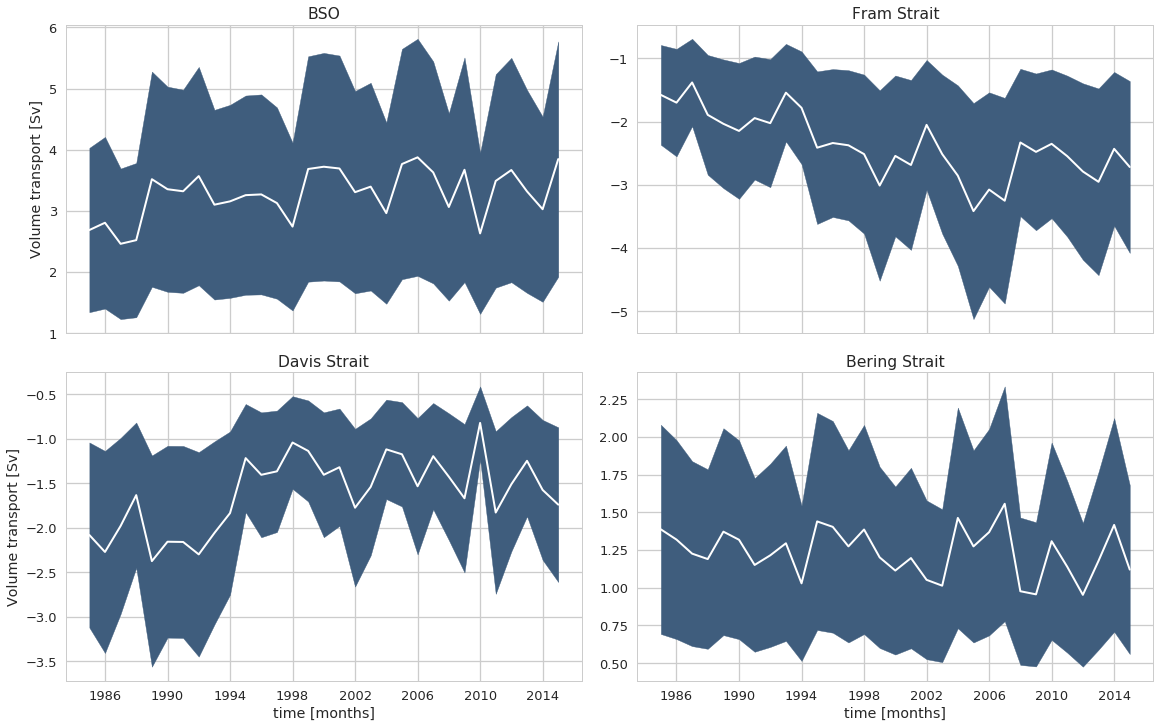

In [80]:
rows,cols = 2,2
figsize=(16, 10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')
dates = pd.date_range('1985', freq="YS", periods= len(np.arange(1985,2016)))

ax1.plot(dates, df_interannual_mean['BSO_VOL_transport'], color="white", lw=2) 
ax1.fill_between(df_interannual_mean.index, df_interannual_mean['BSO_VOL_transport'] - df_interannual_std['BSO_VOL_transport']/2,\
                 df_interannual_mean['BSO_VOL_transport'] + df_interannual_std['BSO_VOL_transport']/2, color="#3F5D7D") 
ax1.set_title('BSO')
#ax1.set_ylim(1,6)
ax1.set_ylabel('Volume transport [Sv]')

ax2.plot(dates, df_interannual_mean['FRAM_VOL_transport'], color="white", lw=2) 
ax2.fill_between(df_interannual_mean.index, df_interannual_mean['FRAM_VOL_transport'] - df_interannual_std['FRAM_VOL_transport']/2,\
                 df_interannual_mean['FRAM_VOL_transport'] + df_interannual_std['FRAM_VOL_transport']/2, color="#3F5D7D") 
ax2.set_title('Fram Strait')
#ax2.set_ylim(-5,0)

ax3.plot(dates, df_interannual_mean['DAVIS_VOL_transport'], color="white", lw=2) 
ax3.fill_between(df_interannual_mean.index, df_interannual_mean['DAVIS_VOL_transport'] - df_interannual_std['DAVIS_VOL_transport']/2,\
                 df_interannual_mean['DAVIS_VOL_transport'] + df_interannual_std['DAVIS_VOL_transport']/2, color="#3F5D7D") 
ax3.set_title('Davis Strait')
#ax3.set_ylim(-4,1)
ax3.set_ylabel('Volume transport [Sv]')
ax3.set_xlabel('time [months]')

ax4.plot(dates, df_interannual_mean['BERING_VOL_transport'], color="white", lw=2) 
ax4.fill_between(df_interannual_mean.index, df_interannual_mean['BERING_VOL_transport'] - df_interannual_std['BERING_VOL_transport']/2,\
                 df_interannual_mean['BERING_VOL_transport'] + df_interannual_std['BERING_VOL_transport']/2, color="#3F5D7D") 
ax4.set_title('Bering Strait')
#ax4.set_ylim(-1,3)
ax4.set_xlabel('time [months]')


Text(0.5,0,'time [months]')

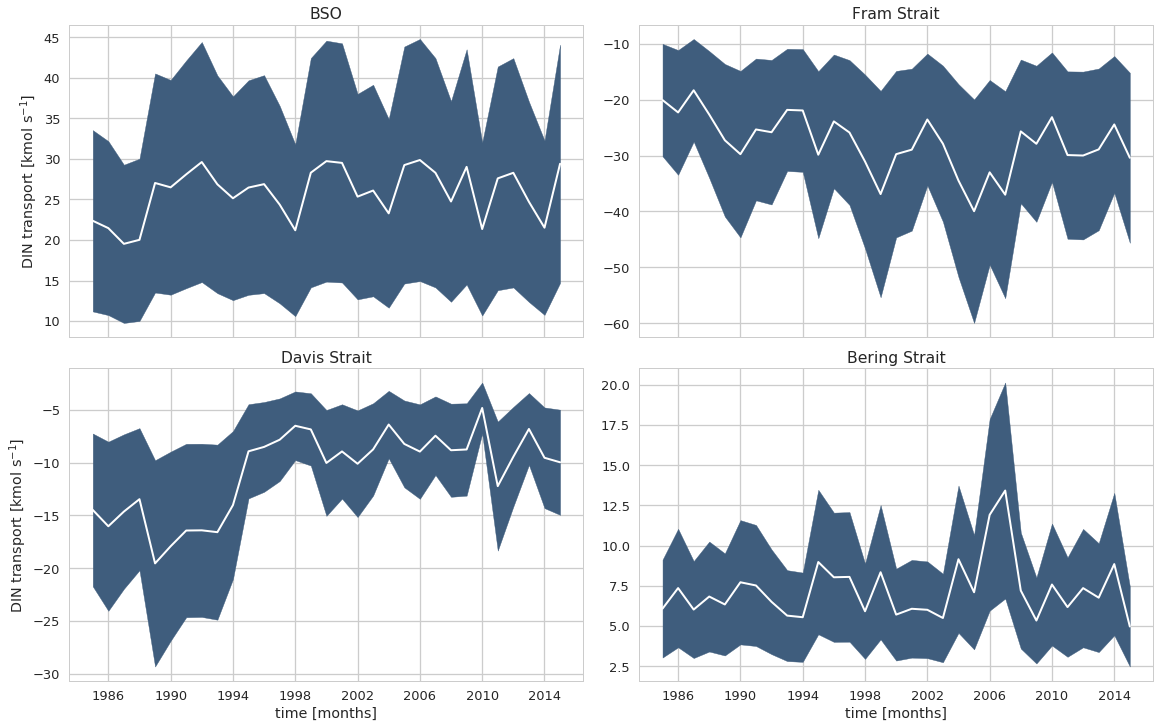

In [82]:
rows,cols = 2,2
figsize=(16, 10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True, sharex=True, sharey=False)#sharey='row'

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')
dates = pd.date_range('1985', freq="YS", periods= len(np.arange(1985,2016)))

ax1.plot(dates, df_interannual_mean['BSO_DIN_transport'], color="white", lw=2) 
ax1.fill_between(df_interannual_mean.index, df_interannual_mean['BSO_DIN_transport'] - df_interannual_std['BSO_DIN_transport']/2,\
                 df_interannual_mean['BSO_DIN_transport'] + df_interannual_std['BSO_DIN_transport']/2, color="#3F5D7D") 
ax1.set_title('BSO')
#ax1.set_ylim(1,6)
ax1.set_ylabel('DIN transport [kmol s$^{-1}$]')

ax2.plot(dates, df_interannual_mean['FRAM_DIN_transport'], color="white", lw=2) 
ax2.fill_between(df_interannual_mean.index, df_interannual_mean['FRAM_DIN_transport'] - df_interannual_std['FRAM_DIN_transport']/2,\
                 df_interannual_mean['FRAM_DIN_transport'] + df_interannual_std['FRAM_DIN_transport']/2, color="#3F5D7D") 
ax2.set_title('Fram Strait')
#ax2.set_ylim(-5,0)

ax3.plot(dates, df_interannual_mean['DAVIS_DIN_transport'], color="white", lw=2) 
ax3.fill_between(df_interannual_mean.index, df_interannual_mean['DAVIS_DIN_transport'] - df_interannual_std['DAVIS_DIN_transport']/2,\
                 df_interannual_mean['DAVIS_DIN_transport'] + df_interannual_std['DAVIS_DIN_transport']/2, color="#3F5D7D") 
ax3.set_title('Davis Strait')
#ax3.set_ylim(-4,1)
ax3.set_ylabel('DIN transport [kmol s$^{-1}$]')
ax3.set_xlabel('time [months]')

ax4.plot(dates, df_interannual_mean['BERING_DIN_transport'], color="white", lw=2) 
ax4.fill_between(df_interannual_mean.index, df_interannual_mean['BERING_DIN_transport'] - df_interannual_std['BERING_DIN_transport']/2,\
                 df_interannual_mean['BERING_DIN_transport'] + df_interannual_std['BERING_DIN_transport']/2, color="#3F5D7D") 
ax4.set_title('Bering Strait')
#ax4.set_ylim(-1,3)
ax4.set_xlabel('time [months]')
